# Mixed Integer Linear Programming

Zapoznamy się ze składnią klasy `MixedIntegerLinearProgram` pozwalającej na efektywne rozwiązywanie dużych problemów liniowych i całkowitoliczbowych.
Pełna dokumentacja znajduje się [na tej stronie](http://doc.sagemath.org/html/en/reference/numerical/sage/numerical/mip.html). Dodatkowe przykłady [można znaleźć tu](https://doc.sagemath.org/html/en/thematic_tutorials/linear_programming.html).

In [1]:
# Przykład minimalny pokazujący wygodny sposób specyfikowania ograniczeń

lp = MixedIntegerLinearProgram(maximization=True)

# Zmienne naszego problemu to x[0], x[1], ...
x = lp.new_variable()

lp.set_objective(3*x[0] - 2*x[1])

# dodajemy nierówności
lp.add_constraint(2*x[0] - x[1] <= 4)
lp.add_constraint(x[0] + 3*x[1] >= 5)
lp.add_constraint(x[1] >= 0)

# Wypisanie problemu
lp.show()

# wynik optymalizacji
print("Wartość optymalna", lp.solve())

# wartosci zmiennych
print("Wartościowanie zmiennych", lp.get_values(x))

Maximization:
  3.0 x_0 -2.0 x_1 

Constraints:
  2.0 x_0 - x_1 <= 4.0
  - x_0 - 3.0 x_1 <= -5.0
  - x_1 <= 0.0
Variables:
  x_0 is a continuous variable (min=-oo, max=+oo)
  x_1 is a continuous variable (min=-oo, max=+oo)
Wartość optymalna 5.57142857142857
Wartościowanie zmiennych {0: 2.4285714285714284, 1: 0.8571428571428572}


Optymalna wartość funkcji celu =  329160687952391321614259596157951/404260725213309252405715172077872
x= 883621487687536435602885920075665/404260725213309252405715172077872  y= 351835391069987397106670749886053/404260725213309252405715172077872  r= 329160687952391321614259596157951/404260725213309252405715172077872


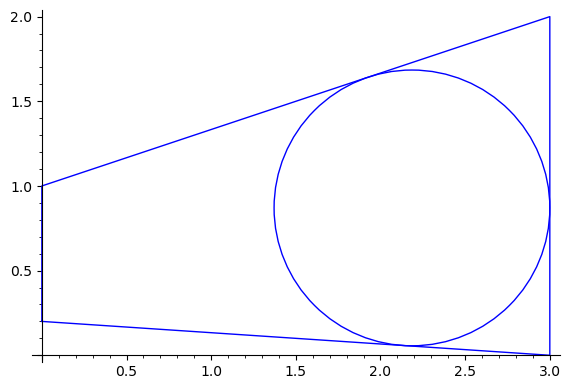

In [2]:
# Maksymalne koło wpisane - tym razem zakodowany za pomocą MixedIntegerLinearProgram

# Dane problemu

W = [ (0.0, 0.2), (0.0, 1.0), (3.0, 2.0), (3.0, 0.0) ]

# Rozwiązanie problemu

p = MixedIntegerLinearProgram(solver='ppl') # Solver inny niż domyślny GLPK
var = p.new_variable(nonnegative=True) # Zakładamy, że wielokąt jest w pierwszej ćwiartce
 
x, y, r = var['x'], var['y'], var['r']

p.set_objective(r)

# A, B - punkty leżące na brzegu półpłaszczyzny; P - punkt leżący wewnątrz
def add_halfplane_constraint(A, B, P):
    dx = A[0] - B[0]
    dy = A[1] - B[1]
    c = dy * A[0] - dx * A[1]

    if -dy * P[0] + dx * P[1] + c < 0:
        dx, dy, c = -dx, -dy, -c

    p.add_constraint((-dy * x + dx * y + c) / sqrt(dy*dy + dx*dx) >= r)

for i in range(len(W) - 2):
    add_halfplane_constraint(W[i], W[i+1], W[i+2])

add_halfplane_constraint(W[-2], W[-1], W[0])
add_halfplane_constraint(W[-1], W[0], W[1])

# Rozwiązanie problemu

print('Optymalna wartość funkcji celu = ', p.solve())
print('x=', p.get_values(x), ' y=', p.get_values(y), ' r=', p.get_values(r))

# Wizualizacja

W.append(W[0])
circle((p.get_values(x), p.get_values(y)), p.get_values(r)) + list_plot(W, plotjoined=True)